# Customer Characteristics that Affect Loan Status and Amount

## Investigation Overview
In this investigation I seek to explore what factors affect a customer's likelihood to get financed for a loan and the loan's outcome status i.e. whether or not the loan is paid back. Factors which I mainly focussed on included: IncomeRange, IncomeVerifiable, LoanStatus and ProsperScore.

## Dataset Overview
The data consisted of 113937 observations, 81 features. The attributes included the fore-mentioned attributes and others such as Investors. 
I didn't drop any columns but instead filtered through the values in order to obtain the target dataset.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

In [39]:
df = pd.read_csv('prosperLoanData.csv')

In [40]:
# Obtaining the dataset of interest 
values=['Current','Completed','Defaulted','Chargedoff']
loan = df.query("LoanStatus in @values")#obtaining a dataset based on the values above
loan['LoanStatus'].replace('Chargedoff', 'Defaulted', inplace=True)

C:\Users\joshu\AppData\Local\Temp\ipykernel_34628\3614666422.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['LoanStatus'].replace('Chargedoff', 'Defaulted', inplace=True)


In [41]:
# Performing cleaning steps on the employment status column
loan['EmploymentStatus'].replace(['Self-employed', 'Full-time'], ['Employed', 'Employed'], inplace=True)
loan['EmploymentStatus'].replace(['Part-time', 'Retired'], ['Employed', 'Not employed'], inplace=True)
loan['EmploymentStatus'].value_counts()

C:\Users\joshu\AppData\Local\Temp\ipykernel_34628\3713529760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['EmploymentStatus'].replace(['Self-employed', 'Full-time'], ['Employed', 'Employed'], inplace=True)
C:\Users\joshu\AppData\Local\Temp\ipykernel_34628\3713529760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['EmploymentStatus'].replace(['Part-time', 'Retired'], ['Employed', 'Not employed'], inplace=True)


Employed         98784
Not available     5346
Other             3680
Not employed      1598
Name: EmploymentStatus, dtype: int64

## Loan Status vs Income Range

Most of the loanees are employed. Most current loans are owed by the low-middle income ranges of between 25000-74999.
It seems odd that people that people earning more than 100000 have more current loans than people in the income range between 75000-99999.

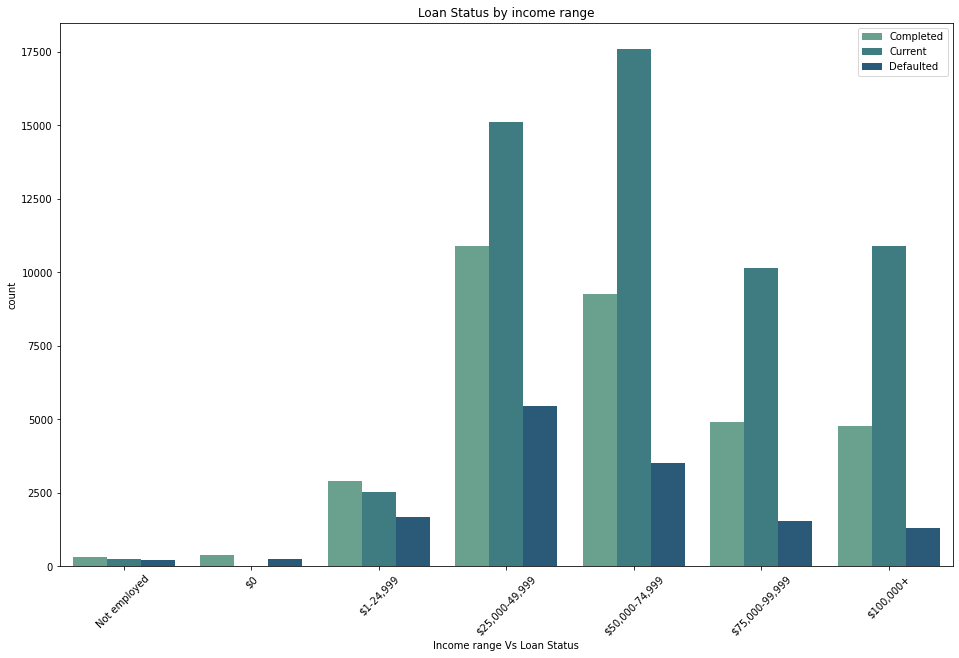

In [42]:
df2 = loan[~(loan['IncomeRange'] == 'Not displayed')]
#dark:#69d_r

plt.figure(figsize = [16, 10])
ax=sns.countplot(data = df2, x = 'IncomeRange', hue = 'LoanStatus', palette = 'crest', order=['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'])
ax.set_title("Loan Status by income range", fontsize = 12)
plt.legend(loc='upper right')
plt.xticks(rotation=45);
plt.xlabel('Income range Vs Loan Status');

## Prosper Score Vs Loan Status
Most current loans are owed by loanees with a prosper score of 4.0. Most completed loans are by people with a prosper score of 8.0. Most likely to default are by people with a prosper score of between 4.0 to 8.0


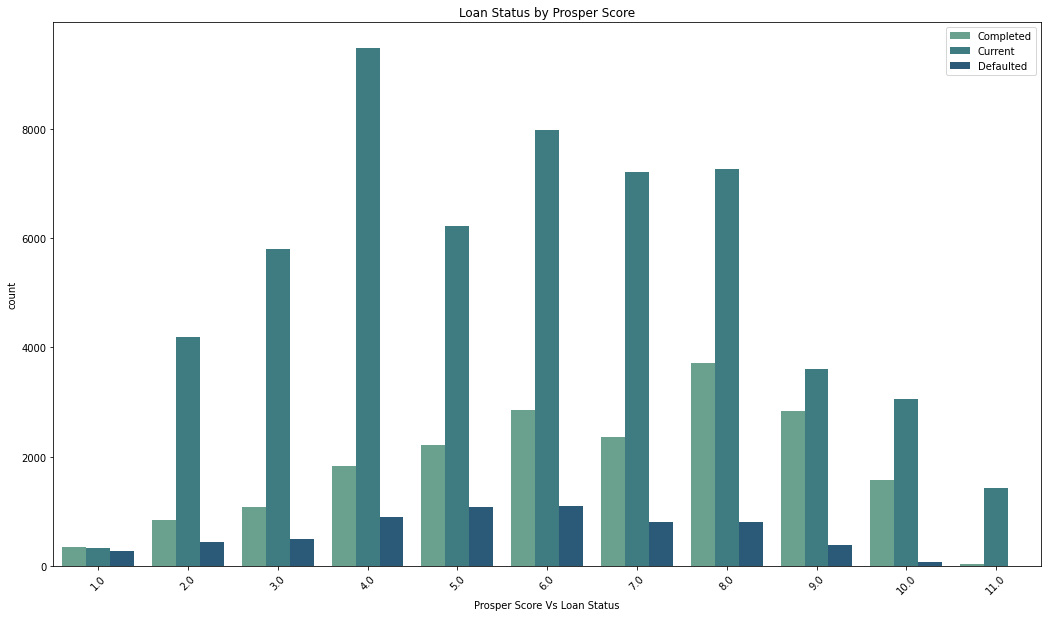

In [43]:
plt.figure(figsize = [17.7, 10])
ax=sns.countplot(data = loan, x = 'ProsperScore', hue = 'LoanStatus', palette = 'crest')
ax.set_title("Loan Status by Prosper Score", fontsize = 12)
plt.legend(loc='upper right')
plt.xticks(rotation=45);
plt.xlabel('Prosper Score Vs Loan Status');

## Prosper Score Vs Investors
People with a prosper score of more than 7.0 are increasingly more likely to get financed by investors.

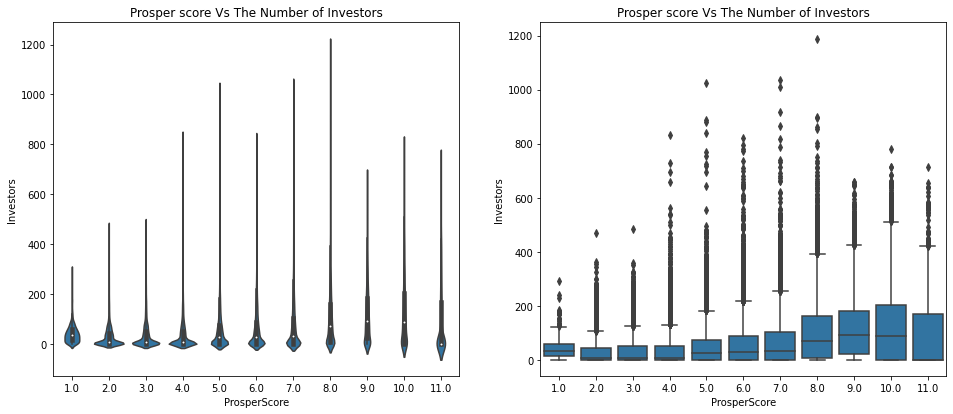

In [44]:
base_color = sns.color_palette()[0]
plt.figure(figsize = [16, 6.5])

plt.subplot(1, 2, 1)
ax = sns.violinplot(data=loan, y='Investors', x='ProsperScore', color=base_color)
ax.set_title('Prosper score Vs The Number of Investors')
plt.subplot(1, 2, 2)
sns.boxplot(data=loan, y='Investors', x='ProsperScore', color=base_color)
plt.title('Prosper score Vs The Number of Investors');

## Income Range, Investors and Verifiable Income
People with a verifiable source of income tend to have more investors.
Income Verifiability seems to increase as you move up the income ranges

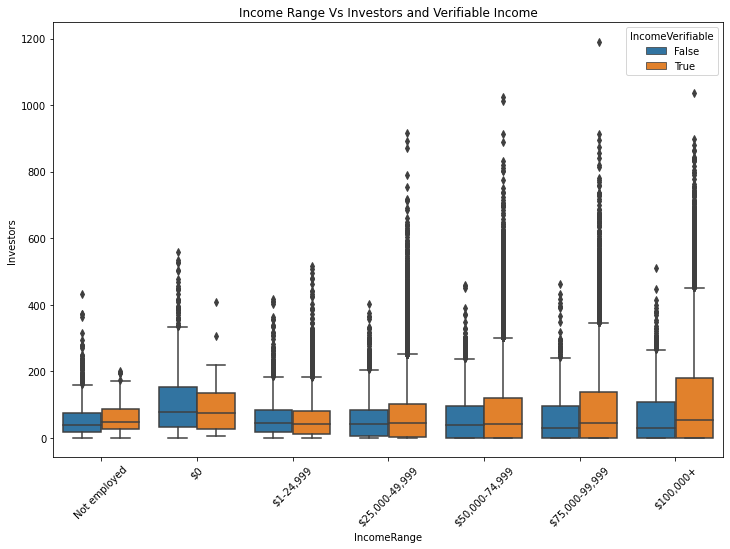

In [45]:
plt.figure(figsize = [12, 8])
sns.boxplot(data=loan, x='IncomeRange', y='Investors', hue='IncomeVerifiable', order=['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'])
plt.xticks(rotation=45);
plt.title('Income Range Vs Investors and Verifiable Income');

In [46]:
!jupyter nbconvert Project_Prosper_Loan_Part_II.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Project_Prosper_Loan_Part_II.ipynb to slides
[NbConvertApp] Writing 725161 bytes to Project_Prosper_Loan_Part_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "D:\Anaconda installation\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "D:\Anaconda installation\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "D:\Anaconda installation\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "D:\Anaconda installation\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "D:\Anaconda installation\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  F